# Matrix encoding

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Алгоритм преобразования</a></span><ul class="toc-item"><li><span><a href="#Описание-алгоритма" data-toc-modified-id="Описание-алгоритма-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Описание алгоритма</a></span></li></ul></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Кодирование" data-toc-modified-id="Кодирование-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Кодирование</a></span></li><li><span><a href="#Декодирование" data-toc-modified-id="Декодирование-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Декодирование</a></span></li><li><span><a href="#Проверка-на-модели-ML" data-toc-modified-id="Проверка-на-модели-ML-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Проверка на модели ML</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Цель - защитить данные клиентов страховой компании. Применим такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуем корректность его работы.

Важное условие - нужно защитить данные так, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

RANDOM_STATE=12345

## Загрузка данных

In [2]:
try:
    df = pd.read_csv('/datasets/insurance.csv') #путь для ревьюера
except FileNotFoundError:
    df = pd.read_csv('datasets/insurance.csv')

In [3]:
display(df.head(10))
df.info()
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

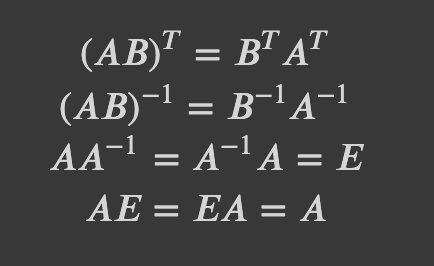

**Вопрос:**
Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

**Ответ:** Не изменится. Попробуем доказать это с помощью формул и преобразований измененного вектора весов.  

Пусть $B$ - это случайная обратимая матрица, тогда:
$$
w1 = ((XB)^T XB)^{-1} (XB)^T y = (B^T X^T XB)^{-1} B^T X^T y = (X^T XB)^{-1} (B^T)^{-1} B^T X^T y = B^{-1} (X^T X)^{-1} X^T y
$$

Подставим $w1$ в выражение для $а1$:
$$
a1 = XBB^{-1} (X^T X)^{-1} X^T y = X(X^T X)^{-1} X^T y = a
$$
Наглядно видно тождество предсказаний в обоих вариантах, с умноженим и без

## Алгоритм преобразования

Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.

### Описание алгоритма

Как и было предложено в предыдущем пункте, в качестве одного из способов преобразования данных можно использовать умножение на обратимую невырожденную матрицу (а также следовательно и квадратную).

Обоснование почему качество линейной регресии в данном случае не поменяется, представлено в предыдущем пункте через выведенное тождество векторов предсказаний. 

Подозреваю, что это далеко не самый продвинутый способ "шифрования", но все-таки матрица будет каким-никаким ключом. 
Размерность матрицы будет равна кол-ву принаков в `features`, то есть shape=(features.shape[1], features.shape[1]).  
*Обратимая матрица используется потому, что с помощью умножения на матрицу, обратной матрице-ключу, можно получить исходные признаки*

Реализовать такое кодирование можно как с помощью функции, так и заложить свой метод в класс модели (в случае самостоятельной реализации).

В качестве аргументов функции задаются непосредственные признаки, которые нужно преобразовать и random_state для возможности воспроизведения кодирования.  

На выходе функции преобразованные признаки и матрица-ключ. Можно сохранить имена колонок признаков, но вроде этого не требуется.

Внутри функции стоит проверить сгенерированную матрицу на обратимость.

По сути описанный алгоритм является [шифром Хилла](https://habr.com/ru/post/595281/)

In [4]:
def encoder(features: {pd.core.frame.DataFrame, np.ndarray}, random_state: int):
    'умножает матрицу с признаками на сгенерированную обратимую матрицу'
    rng = np.random.default_rng(random_state)
    key = rng.integers(100, size=(features.shape[1], features.shape[1]))
    if np.linalg.det(key) != 0:
        features_encoded = features.dot(key)
        print('Данные закодированы, ключ сгенерирован')
        return features_encoded, key
    else:
        print('Сгенерированный ключ не имеет обратной матрицы')

In [5]:
def encoder_ver2(features: {pd.core.frame.DataFrame, np.ndarray}, random_state: int):
    'умножает матрицу с признаками на сгенерированную обратимую матрицу'
    rng = np.random.default_rng(random_state)
    key = rng.integers(100, size=(features.shape[1], features.shape[1]))
    det = np.linalg.det(key)
    while det == 0:
        print('Сгенерированный ключ не имеет обратной матрицы')
        random_state +=1
        rng = np.random.default_rng(random_state)
        key = rng.integers(100, size=(features.shape[1], features.shape[1]))
        det = np.linalg.det(key)
    else:
        features_encoded = features.dot(key) 
        print('Данные закодированы, ключ сгенерирован')
        return features_encoded, key, random_state
    

In [6]:
encoder_ver2(df, RANDOM_STATE)

Данные закодированы, ключ сгенерирован


(              0          1          2          3          4
 0     4120126.0  1639468.0  2780492.0  2930510.0  1043313.0
 1     3157722.0  1256990.0  2131240.0  2246663.0   799961.0
 2     1745291.0   694856.0  1177943.0  1241842.0   442131.0
 3     3462795.0  1377488.0  2336741.0  2462480.0   876707.0
 4     2168581.0   863114.0  1463554.0  1542675.0   549212.0
 ...         ...        ...        ...        ...        ...
 4995  2965348.0  1179936.0  2001210.0  2109166.0   750980.0
 4996  4351904.0  1731398.0  2936745.0  3094993.0  1101820.0
 4997  2815316.0  1120024.0  1899874.0  2002182.0   712868.0
 4998  2715961.0  1080596.0  1832953.0  1931670.0   687860.0
 4999  3372099.0  1341636.0  2275621.0  2398236.0   853806.0
 
 [5000 rows x 5 columns],
 array([[69, 22, 78, 31, 20],
        [79, 64, 67, 98, 39],
        [83, 33, 56, 59, 21],
        [18, 22, 67, 61, 94],
        [70, 24, 91, 94, 73]], dtype=int64),
 12345)

In [7]:
# проверим работу функции
encoder(df, RANDOM_STATE)

Данные закодированы, ключ сгенерирован


(              0          1          2          3          4
 0     4120126.0  1639468.0  2780492.0  2930510.0  1043313.0
 1     3157722.0  1256990.0  2131240.0  2246663.0   799961.0
 2     1745291.0   694856.0  1177943.0  1241842.0   442131.0
 3     3462795.0  1377488.0  2336741.0  2462480.0   876707.0
 4     2168581.0   863114.0  1463554.0  1542675.0   549212.0
 ...         ...        ...        ...        ...        ...
 4995  2965348.0  1179936.0  2001210.0  2109166.0   750980.0
 4996  4351904.0  1731398.0  2936745.0  3094993.0  1101820.0
 4997  2815316.0  1120024.0  1899874.0  2002182.0   712868.0
 4998  2715961.0  1080596.0  1832953.0  1931670.0   687860.0
 4999  3372099.0  1341636.0  2275621.0  2398236.0   853806.0
 
 [5000 rows x 5 columns],
 array([[69, 22, 78, 31, 20],
        [79, 64, 67, 98, 39],
        [83, 33, 56, 59, 21],
        [18, 22, 67, 61, 94],
        [70, 24, 91, 94, 73]], dtype=int64))

На обратимость можно проверить  вот так: Если определитель квадратной матрицы P не равен нулю, значит у нее есть обратная.
    
Если проверка не пройдена - надо как то сгенерировать новую матрицу. В таком случаее изменяем random_state и подаем его на выход функции.

In [ ]:
#КОД РЕВЬЮЕРА
# если тебе RANDOM_STATE не нужен, то сделай, вот так: _ - типа как заглушка
features_encoded, key, _ = encoder_ver2(faetures, RANDOM_STATE)

# Ну или так, если тебе нужно использовать. 
features_encoded, key, random = encoder_ver2(faetures, RANDOM_STATE)

## Проверка алгоритма
Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.


Выполнено в предыдущем пункте

In [8]:
# разобьем исходный датасет на выборки
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

In [9]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=RANDOM_STATE)
print(features_train.shape, features_test.shape, target_train.shape, target_test.shape, sep='\n')

(4000, 4)
(1000, 4)
(4000,)
(1000,)


### Кодирование

In [10]:
# преобразуем тренировочную выборку
features_train_encoded, key_train = encoder(features_train, RANDOM_STATE) 
display(features_train_encoded)
key_train

Данные закодированы, ключ сгенерирован


,0,1,2,3
317,3900912.0,1553898.0,3304722.0,1314776.0
4143,3352469.0,1336982.0,2841238.0,1131311.0
4252,4979425.0,1984836.0,4219379.0,1679464.0
710,3832472.0,1527230.0,3247134.0,1292212.0
148,3822616.0,1523271.0,3238813.0,1288894.0
...,...,...,...,...
3497,3146640.0,1255218.0,2666988.0,1062114.0
3492,2225384.0,887748.0,1885976.0,751048.0
2177,4381545.0,1746620.0,3712823.0,1477896.0
3557,4910464.0,1955874.0,4159792.0,1654846.0


array([[69, 22, 78, 31],
       [20, 79, 64, 67],
       [98, 39, 83, 33],
       [56, 59, 21, 18]], dtype=int64)

In [11]:
np.linalg.det(key_train)

784099.0000000031

### Декодирование

In [12]:
# попробуем декодировать преобразованную тренировочную выборку
display(features_train_encoded.dot(np.linalg.inv(key_train)).head(10))
features_train.head(10)

,0,1,2,3
317,2.986900e-11,20.0,39800.0,2.000000e+00
4143,1.000000e+00,40.0,34200.0,2.301839e-11
4252,1.000000e+00,45.0,50800.0,1.000000e+00
710,2.473688e-11,28.0,39100.0,2.000000e+00
148,-6.744127e-11,28.0,39000.0,1.000000e+00
3938,1.000000e+00,23.0,32200.0,1.000000e+00
1573,1.288109e-11,27.0,36600.0,2.000000e+00
1060,1.000000e+00,42.0,43700.0,3.000000e+00
1911,-8.041673e-11,29.0,40900.0,1.000000e+00
504,-5.033901e-11,21.0,35100.0,5.000000e+00


,Пол,Возраст,Зарплата,Члены семьи
317,0,20.0,39800.0,2
4143,1,40.0,34200.0,0
4252,1,45.0,50800.0,1
710,0,28.0,39100.0,2
148,0,28.0,39000.0,1
3938,1,23.0,32200.0,1
1573,0,27.0,36600.0,2
1060,1,42.0,43700.0,3
1911,0,29.0,40900.0,1
504,0,21.0,35100.0,5


**Вывод:**  
Нули при при декодировании стали близкими к нулю значениями, добавился некоторый шум.  
Но в остальном вроде работает.

### Проверка на модели ML

In [13]:
# посмотрим на метрики для исходных признаков
model_lr_1 = LinearRegression().fit(features_train, target_train)
predictions_1 = model_lr_1.predict(features_train)
r2_score(target_train, predictions_1)

0.4273414981919863

In [14]:
# на тестовой выборке
r2_score(target_test, model_lr_1.predict(features_test))

0.41176839567705004

In [15]:
# теперь посмотрим на метрику R2 при обучении на преобразованных признаках
model_lr_2 = LinearRegression().fit(features_train_encoded, target_train)
predictions_2 = model_lr_2.predict(features_train_encoded)
r2_score(target_train, predictions_2)

0.42734149819197975

In [16]:
# на тестовой выборке
r2_score(target_test, model_lr_2.predict(features_test))

C:\Users\Danil\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


-623.2075352261694

Судя по всему обученную на преобразованных признаках модель некорректно использовать для непреобразованной тестовой выборки.

Преобразуем также тестовою выборку

In [17]:
features_test_encoded, key_test = encoder(features_test, RANDOM_STATE)


Данные закодированы, ключ сгенерирован


In [18]:
# еще раз проверим R2 на тестовой выборке
r2_score(target_test, model_lr_2.predict(features_test_encoded))

0.4117683956770455

**Вывод:**  
Качество модели на основе метрики R2 до преобразования соответствует качеству после.  